T bill drawdown: cash balance at x months after retirement

In [1]:
# import pandas as pd
import logging
from datetime import datetime

from pytirement import draw_down_table

logging.basicConfig(level=logging.INFO) #or DEBUG or INFO

In [2]:
help(draw_down_table)

Help on function draw_down_table in module pytirement.functions:

draw_down_table(tbill_balance, months_to_65, tbill_interest, monthly_withdrawal)
    Returns monthly t bill balance as a dataframe

    Parameters
    tbill_balance       float   Starting balance
    months_to_65        int     Number of months to goal date
    tbill_interest      float   Monthly interest rate, e.g., .04/12 (assumes fixed rate)
    monthly_widthdrawal int     Amount of monthly widthdrawal (assumes fixed draw)



In [3]:
# Months to 65. Change start date later.

start_date = datetime(2025, 2, 1)  # February 2025 - first month w/o income
end_date = datetime(2028, 6, 1)  # age 65
# end_date = datetime(2029, 6, 1)    # age 66
# end_date = datetime(2030, 6, 1)    # age 67

months_to_65 = (end_date.year - start_date.year) * 12 + (
    end_date.month - start_date.month
)

months_to_65

40

In [4]:
tbill_balance = 410000  # estimate for feb 2025
tbill_interest = 0.04 / 12  # monthly
monthly_withdrawal = 7500  # estimate

In [5]:
out_df = draw_down_table(
    tbill_balance, months_to_65, tbill_interest, monthly_withdrawal
)

In [6]:
out_df

,Month,Months to go,Remaining funds
0,1,39,403866.67
1,2,38,397712.89
2,3,37,391538.60
3,4,36,385343.73
4,5,35,379128.21
5,6,34,372891.97
6,7,33,366634.94
7,8,32,360357.06
8,9,31,354058.25
9,10,30,347738.44


In [7]:
# add this column later?

# # Create a date range starting from February 2025 with monthly frequency
# start_date = "2025-02"
# end_date = "2028-05"  # Example end date (adjust as needed)

# # Generate the series of months
# months_series = pd.date_range(start=start_date, end=end_date, freq='MS')

# print(months_series)

<Axes: xlabel='Month'>

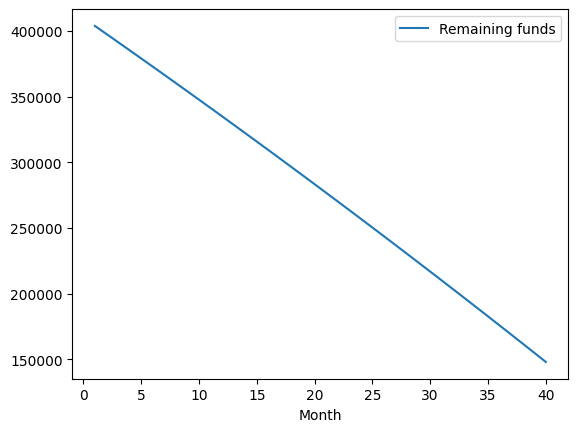

In [8]:
out_df.plot(x="Month", y="Remaining funds")

To do: 

Take a table of scenarios, return table of scenario info + remaining funds. then plot

Different function that just returns last value instead of all years. Keep draw_down_table() for plotting

Then allow the scenarios to include different ending years. 


In [9]:
print("*** Scenarios: funds remaining at 65 ***")

out_df = draw_down_table(
    tbill_balance, months_to_65, tbill_interest, monthly_withdrawal
)
print("basic (defaults):", out_df.tail(1)["Remaining funds"].values[0])

out_df = draw_down_table(
    tbill_balance,
    months_to_65,
    0.03 / 12,  # reduce interest
    monthly_withdrawal,
)
print("reduced interest:", out_df.tail(1)["Remaining funds"].values[0])

out_df = draw_down_table(tbill_balance, months_to_65, tbill_interest, 8000)  # increase
print("increased withdrawal:", out_df.tail(1)["Remaining funds"].values[0])

out_df = draw_down_table(tbill_balance, months_to_65, 0.02 / 12, monthly_withdrawal)
print("minimal (2%) interest:", out_df.tail(1)["Remaining funds"].values[0])

out_df = draw_down_table(
    tbill_balance,
    months_to_65,
    0.03 / 12,  # reduce interest
    8000,
)
print("Increase w/d, reduce interest:", out_df.tail(1)["Remaining funds"].values[0])

out_df = draw_down_table(tbill_balance, months_to_65, tbill_interest, 10000)
print("Live large:", out_df.tail(1)["Remaining funds"].values[0])

out_df = draw_down_table(tbill_balance, months_to_65, tbill_interest, 7000)
print("Reduce spending:", out_df.tail(1)["Remaining funds"].values[0])

*** Scenarios: funds remaining at 65 ***
basic (defaults): 148025.43
reduced interest: 137964.5
increased withdrawal: 126668.81
minimal (2%) interest: 128281.67
Increase w/d, reduce interest: 116957.9
Live large: 41242.31
Reduce spending: 169382.05
